EX1: The binary search algorithm, also known as half-interval search, searches a given value in a sorted array. To search properly this algorithm works only with sorted arrays. It searches recursively by taking the middle point, comparing it with the value and split the problem in two if it doesn't match. With that we can be sure that the algorithm behaves  log(n).

In [1]:
import random, sys, time, numpy, scipy.misc
import matplotlib.pyplot as plt

In [2]:
def binary_search(arr, value):
        left = 0
        right = len(arr)-1
        while (left <= right):
            middle= int((left+right)/2)
            if (arr[middle] == value):
                return middle           
            elif (arr[middle] < value):
                left = middle + 1
            else:
                right = middle -1
        return -1 

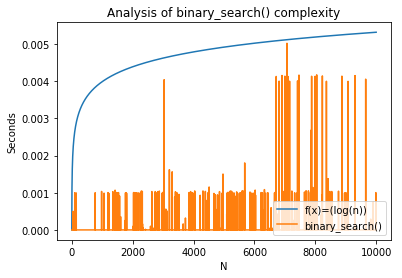

In [3]:
measures = []    
f_x = []
def calculate_time(randomarray):
    start = time.time() 
    binary_search(randomarray,random.choice(randomarray))
    duration = time.time() - start
    return duration

measures = []    
f_x = []
for j in range(1, 10000):
    randomarray = numpy.array(numpy.random.randint(0,9223372036854775807,j, dtype=numpy.int64)).tolist()        
    randomarray.sort()
    duration = calculate_time(randomarray)
    
    measures.append(duration)
    f_x.append((numpy.log2(j))/2500)
# measures.sort()
measures = measures[:len(measures)]
plt.title("Analysis of binary_search() complexity")
plt.ylabel('Seconds')
plt.xlabel('N')
plt.plot(f_x, label='f(x)=(log(n))')
plt.plot(measures, label='binary_search()')
plt.legend(loc=4)
plt.show()

For this experiment I measured the time needed to find the variable in arrays increasing in size up to n=10000. The variable which is searched is a random element from a given array which changes every time to be sure to cover all the possibilities. The searched array is also a new random array each iteration. The sorting happens before counting the time needed to search.

If we don't take into the account the occasions when the element can be found at the first onset(when the time to complete the search is too small) we can observe that with increasing number of items in array the time grows logarithmically.

In [4]:
i = 1
while i <= 10000:
    searches = 0
    start = time.time()
    while (time.time() - start) <= 60:
        randomarray = numpy.array(numpy.random.randint(0,9223372036854775807,i, dtype=numpy.int64)).tolist()        
        randomarray.sort()
        binary_search(randomarray,numpy.random.randint(0,9223372036854775807, dtype=numpy.int64))
        searches += 1
    print ("i: ", i, ", searches: ", searches)
    i *= 10

i:  1 , searches:  4705821
i:  10 , searches:  3101722
i:  100 , searches:  1114599
i:  1000 , searches:  117689
i:  10000 , searches:  9160


The goal of this experiment was to prove that by increasing the size of array the time to complete binary search is O(log(n)).
To calculate it I was counting the number of searches that my function was able to complete in one minute for i = 1,10,100,1000,10000 respectively. As we see in a result the number of searches decreases logarithmically.

EX2: T(n) = 7T(n/3) + $n^2$ $\Rightarrow a=7, b=3, f(n)=n^2$

As log<sub>3</sub><sup>7</sup> < 2 it satisfies case 3 because log<sub>b</sub><sup>a</sup> < c, where c is a power of n.

Anyway, firstly, we know that $log_3(7) = 1.77...$, so $\nexists \epsilon > 0 :$ 

$n^{2}=O(n^{0.1.77... - \epsilon})$. 

This case is then not possible.

Secondly, I will test here if $n^{2} = O(n^{log_3(7)} * log^{k}(n)), k \geq 0$.
In order to see that, the limit of the division of both terms must not be positive (that would mean that $n^{2}$ grows faster).

$\lim_{n \to \infty} \frac{n^{2}}{n^{log_3(7)}} * log^{k}(n) = \lim_{n \to \infty} \frac{n}{n^{1.77...-1} * \frac{log^{k}(n)}{n}} =$ positive $\forall k$. 

As such this case is not possible. 

Thirdly, I will test here $n^{2} = \Omega(n^{log_3(7)+\epsilon}), \epsilon \geq 0$. This is the case $ \epsilon \geq 2 - log_3(7) = 0.228...$. 

According to the master theorem, that means that $T(n) = 7T(n/3)+n^{2} = \Theta(n^{2})$.

EX3: The running time of binary search algorithm in the worst case is $T(n)=T(n/2)+O(1)$;

where n is the size of the problem, n/2 is the size of each subproblem, in binary search each subproblem have the same size and O(1) is the cost of the work done outside the recursive calls, which includes the cost of dividing the problem and the cost of merging the solutions to the subproblems.

As it's seen from the formula we can apply a master's theorem to find the complexity. So, here a = 1, b = 2 and f(n) =  $\theta(1)${Constant}. In this condition it fits the second case of Master's theorem because $f(n) =  \theta(1) =  \theta(n^{log_b(a)}) =   \theta(n^{log_2(1)})$, then  $T(n)= \theta(n^{log_b(a)}*log_2n)$ and as $n^{log_b(a)} = n^0$ we get the time complexity of binary search algorithm which is equal to $T(n)= \theta(log_2n)$

In [ ]:
EX4:

EX5:

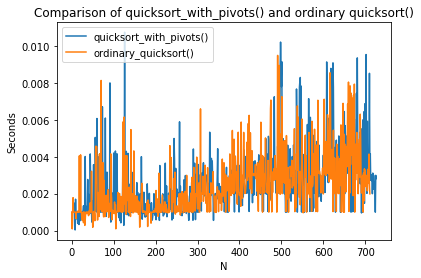

In [5]:
# def quicksort_with_pivots(array, low_pivot, high_pivot):
def quicksort_with_pivots2(arr,low,high):
    if low<high:
        j = partition(arr,low,high)
        quicksort_with_pivots2(arr,low,j-1)
        quicksort_with_pivots2(arr,j+1,high)
 
 
def partition(arr,low,high):
    pivot = arr[low]
    i = low+1
    j = high

    flag = False
    while not flag:
        
        while i <= j and arr[i] <= pivot:
            i = i + 1
            
        while arr[j] >= pivot and j >= i:
            j = j -1
            
        if j < i:
            flag = True
            
        else:
            temp = arr[i]
            arr[i] = arr[j]
            arr[j] = temp

        temp = arr[low]
        arr[low] = arr[j]
        arr[j] = temp

    return j
def quicksort(x):
    if len(x) < 2:
        return x
    else:
        pivot = x[0]
        less = [i for i in x[1:] if i <= pivot]
        greater = [i for i in x[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)
def calculate_time(array, a):
    start = time.time()
    if a == "quicksort_with_pivots":
        quicksort_with_pivots2(array, 0, len(array)-1)
    else:
        quicksort(array)
    duration = time.time() - start
    return duration   
    
def compare(n):
    measures = []
    python_measures = []
#     print(n)
    for j in range(1, n): 
        randomarray = numpy.array(numpy.random.randint(0,9223372036854775807,j, dtype=numpy.int64)).tolist()
        
        duration = calculate_time(randomarray.copy(),"quicksort_with_pivots")
#         start = time.time() 
#         quicksort_with_pivots(randomarray, int(len(randomarray)/2), len(randomarray)-1)
#         duration = time.time() - start
        if duration != 0:
            measures.append(duration)
        duration2 = calculate_time(randomarray.copy(), "ordinary_quicksort")
        
#         start = time.time() 
#         quicksort(randomarray)
#         duration2 = time.time() - start
        if duration2 != 0:
            python_measures.append(duration2)
  
    plt.title("Comparison of quicksort_with_pivots() and ordinary quicksort()")
    plt.ylabel('Seconds')
    plt.xlabel('N')

    plt.plot(measures, label='quicksort_with_pivots()')
    plt.plot(python_measures, label='ordinary_quicksort()')
    plt.legend(loc='upper left')
    plt.show()
compare(1000)

 As we can see in this plot, ordinary quicksort and quick sort with pivots are actually similar,but quick sort with pivots is  more stable. We can see that many "spikes" are regularely present. This regularity can be due to bad splits. I split my partitions in two sets in equal size by taking the first pivot at the beginning and the second at the end of the array. In order to make the code more robust we could force the pivot choice to a random pivot. This would take off the risk of a  $n^2$  case.